In [7]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Some parameters to describe the geometry:
eps = 13  # dielectric constant of waveguide
w = 1.2  # width of waveguide
r = 0.36  # radius of holes

# The cell dimensions
sy = 12  # size of cell in y direction (perpendicular to wvg.)
dpml = 1  # PML thickness (y direction only!)

cell = mp.Vector3(1, sy)

b = mp.Block(size=mp.Vector3(mp.inf, w, mp.inf), material=mp.Medium(epsilon=eps))
c = mp.Cylinder(radius=r)

fcen = 0.5  # pulse center frequency
df = 1  # pulse freq. width: large df = short impulse

s = mp.Source(
    src=mp.GaussianSource(fcen, fwidth=df),
    component=mp.Hz,
    center=mp.Vector3(0),
)

sym = mp.Mirror(direction=mp.Y, phase=-1)

sim = mp.Simulation(
    cell_size=cell,
    geometry=[b, c],
    sources=[s],
    symmetries=[sym],
    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
    resolution=20,
)

kx = False  # if true, do run at specified kx and get fields
if kx:
    sim.k_point = mp.Vector3(kx)

    sim.run(
        mp.at_beginning(mp.output_epsilon),
        mp.after_sources(mp.Harminv(mp.Hz, mp.Vector3(0.1234), fcen, df)),
        until_after_sources=300,
    )

    sim.run(mp.at_every(1 / fcen / 20, mp.output_hfield_z), until=1 / fcen)

else:
    k_interp = 19  # # k-points to interpolate, otherwise

    freqs = sim.run_k_points(300, mp.interpolate(k_interp, [mp.Vector3(), mp.Vector3(0.5)]))

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000643969 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00704002 s
-----------
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.6401666577799529, -0.005294967106836287, 60.450484853195704, 0.005920263419231861, 0.001555933461217816-0.0057121440823352555i, 2.3909991606555145e-05+0.0i
harminv0:, 0.7003226319367004, -0.0036973558878585287, 94.70587268004653, 0.010649376027790584, 0.008806239931711705+0.0059882675329686955i, 8.71831602811364e-07+0.0i
harminv0:, 0.8878735591033889, -0.000256859

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot: xlabel='X', ylabel='Y'>

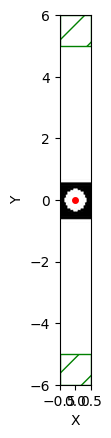

In [9]:
sim.plot2D()

In [10]:
len(mp.interpolate(k_interp, [mp.Vector3(), mp.Vector3(0.5)]))

21

(0.0, 0.5)

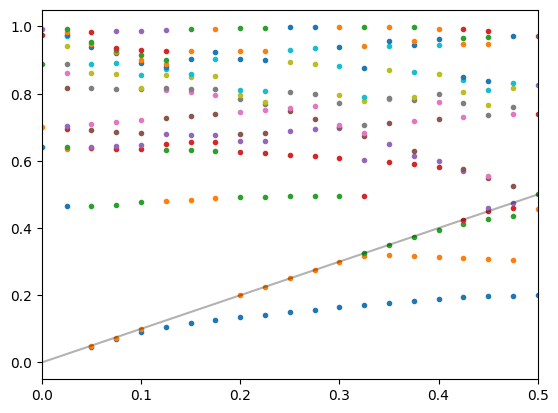

In [11]:
ks = np.linspace(0, 0.5, k_interp+2)
for i in range(k_interp+2):
    for w in freqs[i]:
        plt.plot(ks[i], w, '.')
    plt.gca().set_prop_cycle(None)
    # plt.scatter([ks[i]]*len(freqs[i]), freqs[i], color='k')
plt.plot([0,1],[0,1],'k', alpha=0.3)
plt.xlim([0, 0.5])